# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [2]:
# import matplotlib.pyplot as plt
# import mplleaflet
# import pandas as pd

# def leaflet_plot_stations(binsize, hashid):

#     df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

#     station_locations_by_hash = df[df['hash'] == hashid]

#     lons = station_locations_by_hash['LONGITUDE'].tolist()
#     lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))

#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()

# leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
pre_2015 = df.loc[df['Date'] < '2015'].copy()

In [5]:
line_df = pd.DataFrame({'Date':pd.date_range(start='2011-01-01', end='2011-12-31'), 'TMIN':2000, 'TMAX':-2000})
line_df.head()

,Date,TMIN,TMAX
0,2011-01-01,2000,-2000
1,2011-01-02,2000,-2000
2,2011-01-03,2000,-2000
3,2011-01-04,2000,-2000
4,2011-01-05,2000,-2000


In [6]:
line_df['Date'] = line_df['Date'].dt.strftime('%d-%m')
line_df.head()

,Date,TMIN,TMAX
0,01-01,2000,-2000
1,02-01,2000,-2000
2,03-01,2000,-2000
3,04-01,2000,-2000
4,05-01,2000,-2000


In [7]:
pre_2015['ShDate'] = pre_2015['Date'].dt.strftime('%m-%d')
pre_2015.head()

,ID,Date,Element,Data_Value,ShDate
0,USW00094889,2014-11-12,TMAX,22,11-12
1,USC00208972,2009-04-29,TMIN,56,04-29
2,USC00200032,2008-05-26,TMAX,278,05-26
3,USC00205563,2005-11-11,TMAX,139,11-11
4,USC00200230,2014-02-27,TMAX,-106,02-27


In [8]:
min_max = pre_2015.groupby(['ShDate', 'Element']).agg({np.min, np.max})
min_max = min_max.drop(['ID', 'Date'], axis=1)
min_max.head()

Data_Value     
                     amax amin
ShDate Element                
01-01  TMAX           156  -93
       TMIN            72 -160
01-02  TMAX           139 -100
       TMIN            28 -267
01-03  TMAX           133 -117

In [9]:
min_max = min_max.unstack()
min_max.head()

Data_Value               
              amax      amin     
Element       TMAX TMIN TMAX TMIN
ShDate                           
01-01          156   72  -93 -160
01-02          139   28 -100 -267
01-03          133   28 -117 -267
01-04          106   44 -100 -261
01-05          128   94  -50 -150

In [10]:
min_max.iloc[180]

                  Element
Data_Value  amax  TMAX       389
                  TMIN       228
            amin  TMAX       217
                  TMIN        78
Name: 06-29, dtype: int64

In [11]:
min_max.columns = min_max.columns.droplevel().droplevel()
min_max.head()

Element,TMAX,TMIN,TMAX,TMIN
ShDate,,,,
01-01,156,72,-93,-160
01-02,139,28,-100,-267
01-03,133,28,-117,-267
01-04,106,44,-100,-261
01-05,128,94,-50,-150


In [12]:
columns = ['TMAX', 'bye', 'bye', 'TMIN']
min_max.columns = columns
min_max = min_max.drop('bye', axis=1)
min_max.head()

,TMAX,TMIN
ShDate,,
01-01,156,-160
01-02,139,-267
01-03,133,-267
01-04,106,-261
01-05,128,-150


In [13]:
min_max = min_max.reset_index()
min_max['TMAX'] = min_max['TMAX']/10
min_max['TMIN'] = min_max['TMIN']/10
min_max = min_max.drop(index=59)
min_max = min_max.reset_index().drop('index', axis=1)
min_max

,ShDate,TMAX,TMIN
0,01-01,15.6,-16.0
1,01-02,13.9,-26.7
2,01-03,13.3,-26.7
3,01-04,10.6,-26.1
4,01-05,12.8,-15.0
...,...,...,...
360,12-27,18.9,-13.8
361,12-28,19.4,-16.6
362,12-29,12.8,-15.0
363,12-30,11.7,-14.4


In [14]:
data_2015 = df.loc[df['Date'] >= '2015'].copy()
data_2015.head()

,ID,Date,Element,Data_Value
19,USC00205563,2015-01-03,TMIN,-39
30,USC00203712,2015-03-17,TMAX,189
34,USC00200032,2015-06-06,TMIN,128
46,USW00014833,2015-08-30,TMIN,178
50,USC00202308,2015-08-30,TMIN,156


In [15]:
data_2015['ShDate'] = data_2015['Date'].dt.strftime('%m-%d')
data_2015.head()

,ID,Date,Element,Data_Value,ShDate
19,USC00205563,2015-01-03,TMIN,-39,01-03
30,USC00203712,2015-03-17,TMAX,189,03-17
34,USC00200032,2015-06-06,TMIN,128,06-06
46,USW00014833,2015-08-30,TMIN,178,08-30
50,USC00202308,2015-08-30,TMIN,156,08-30


In [16]:
min_max_2015 = data_2015.groupby(['ShDate', 'Element']).agg({np.min, np.max})
min_max_2015 = min_max_2015.drop(['ID', 'Date'], axis=1)
min_max_2015.head()

Data_Value     
                     amax amin
ShDate Element                
01-01  TMAX            11  -67
       TMIN           -71 -133
01-02  TMAX            39  -22
       TMIN           -28 -122
01-03  TMAX            39    0

In [17]:
min_max_2015 = min_max_2015.unstack()
min_max_2015.columns = min_max_2015.columns.droplevel().droplevel()
min_max_2015.head()

Element,TMAX,TMIN,TMAX,TMIN
ShDate,,,,
01-01,11,-71,-67,-133
01-02,39,-28,-22,-122
01-03,39,-28,0,-67
01-04,44,6,0,-88
01-05,28,-89,-88,-155


In [18]:
columns = ['TMAX', 'bye', 'bye', 'TMIN']
min_max_2015.columns = columns
min_max_2015 = min_max_2015.drop('bye', axis=1)
min_max_2015.head()

,TMAX,TMIN
ShDate,,
01-01,11,-133
01-02,39,-122
01-03,39,-67
01-04,44,-88
01-05,28,-155


In [19]:
min_max_2015 = min_max_2015.reset_index()
min_max_2015['TMAX'] = min_max_2015['TMAX']/10
min_max_2015['TMIN'] = min_max_2015['TMIN']/10
min_max_2015.head()

,ShDate,TMAX,TMIN
0,01-01,1.1,-13.3
1,01-02,3.9,-12.2
2,01-03,3.9,-6.7
3,01-04,4.4,-8.8
4,01-05,2.8,-15.5


In [20]:
max_data = min_max_2015['TMAX'].where(min_max_2015['TMAX'] > min_max['TMAX']).dropna()
max_data.head()

39      8.3
106    27.8
126    30.6
127    33.3
130    30.6
Name: TMAX, dtype: float64

In [21]:
min_data = min_max_2015['TMIN'].where(min_max_2015['TMIN'] < min_max['TMIN']).dropna()
min_data.head()

4    -15.5
10   -20.0
33   -23.8
44   -23.9
45   -26.0
Name: TMIN, dtype: float64

In [22]:
min_max.iloc[39]

ShDate    02-09
TMAX        7.8
TMIN      -21.0
Name: 39, dtype: object

In [23]:
%matplotlib notebook

<IPython.core.display.Javascript object>


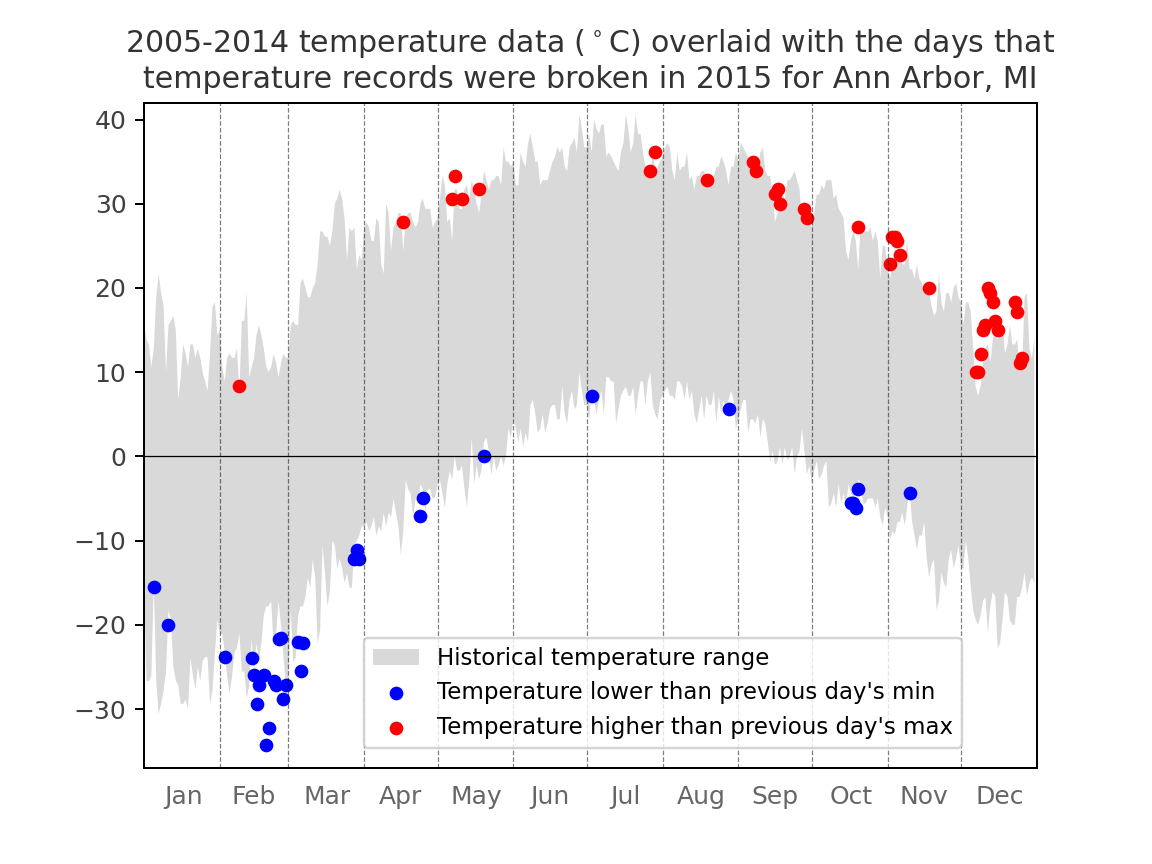

In [52]:
plt.figure()
# plt.plot(range(366), min_max['TMAX'], '-', range(366), min_max['TMIN'], '-')
plt.gca().fill_between(range(len(min_max['TMAX'])),
                      min_max['TMAX'], min_max['TMIN'],
                      facecolor='black',
                      alpha=0.15,
                      label='Historical temperature range')

# plt.plot(min_data.index, min_data, 'o', max_data.index, max_data, 'o')
plt.scatter(min_data.index, min_data, s=20, c='blue', label='Temperature lower than previous day\'s min')
plt.scatter(max_data.index, max_data, s=20, c='red', label='Temperature higher than previous day\'s max')

plt.gca().set_xlim(left=0, right=365)
plt.gca().set_ylim(bottom=-37, top=42)
plt.gca().axhline(lw=0.5, c='black')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pos = [16, 45, 75, 105, 136, 166, 197, 228, 258, 289, 319, 350]
line_pos = [45-14, 75-16, 105-15, 136-16, 166-15, 197-16, 228-16, 258-15, 289-16, 319-15, 350-16]
plt.xticks(pos, months, alpha=0.6)
plt.yticks(alpha=0.75)

for position in line_pos:
    plt.gca().axvline(x=position, lw=0.5, c='black', alpha=0.5, linestyle='dashed')

plt.tick_params(bottom=False)
plt.title('2005-2014 temperature data ($^\circ$C) overlaid with the days that\ntemperature records were broken in 2015 for Ann Arbor, MI',
         alpha=0.8
         )


plt.legend(loc=(0.246, 0.03), frameon=True, prop={'size':9.15})
plt.savefig('tempdata.png', dpi=300)
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)

In [56]:
df.where(df['Data_Value'] < -100).dropna()

,ID,Date,Element,Data_Value
4,USC00200230,2014-02-27,TMAX,-106.0
44,USC00208972,2013-02-27,TMIN,-106.0
45,USC00200230,2008-02-10,TMIN,-172.0
71,USC00200230,2007-02-13,TMIN,-117.0
82,USC00200228,2008-02-23,TMIN,-122.0
...,...,...,...,...
165023,USC00205822,2015-01-16,TMIN,-150.0
165026,USW00094889,2013-01-01,TMIN,-160.0
165030,USC00208202,2009-01-21,TMIN,-211.0
165046,USC00207312,2010-12-22,TMIN,-122.0
